# Q-Learning for FrozenLake 4x4

Based on https://colab.research.google.com/drive/1oqon14Iq8jzx6PhMJvja-mktFTru5GPl#scrollTo=5aQKQMJTJBPH

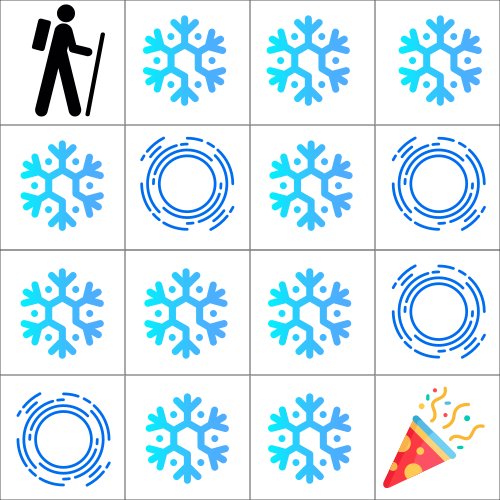

Import the dependencies: numpy, OpenAI Gym, and random.

In [1]:
import numpy as np
import gym
import random

Create a deterministic Frozen Lake environment, from the gym library, and render it on the
screen.

In [2]:
# Create environment
# Even though the original problem description has slippery environment, we are working in a non-slippery environment.
# In our environment, if you go right, you only go right; in the original environment, if you intend to go right, you 
# can go right, up or down with 1/3 probability.

from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196, # optimum = .8196, changing this seems have no influence
)

env = gym.make("FrozenLakeNotSlippery-v0")

Alternatively, we can simply do as follows:

In [3]:
env = gym.make('FrozenLake-v1', is_slippery=True)
env.reset()

0

Render the environment on the screen.

In [5]:
env.render()

The action space size and the state space size for this environment can be obtained as follows:

In [6]:
action_size = env.action_space.n
state_size = env.observation_space.n
print(f'action size: {action_size}, state size: {state_size}')

action size: 4, state size: 16


Create a Q-table of shape *state_size* x *action_size*, and initialize its values with zeros.

In [7]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Now we create some hyperparameters for the Q-learning algorithm:
- the total number of episodes to run
- the maximum number of steps per episode
- the learning rate
- the discount factor
- the range for the exploration parameter epsilon
- the epsilon decay rate

In [8]:
# Set hyperparameters for Q-learning

# @hyperparameters

total_episodes = 200        # Total episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.8           # Learning rate
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.001             # Exponential decay rate for exploration prob
#I find that decay_rate=0.001 works much better than 0.01

Implement Q-learning and use it to train the agent. Print some information as learning takes place.

In [14]:
# Learn through Q-learning

# List of rewards
rewards = []

# For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
#     print(f"state: {state}")
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
#         print(f"start step...")
        # Choose an action (a) in the current world state (s)
        
        # Shall we explore or exploit?
        exp_exp_tradeoff = random.uniform(0, 1)
        
#         print(f"exp_exp_tradeoff: {exp_exp_tradeoff}")
        
        ## If this number > greater than epsilon --> exploitation 
        #(taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            print(f"state {state}")
            print(f"qtable {qtable}")
            print(f"qtable[state,:] {qtable[state,:]}")
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            
#         print(f"action is {action}")

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        
#         print(f"new_state: {new_state}, reward: {reward}, done: {done}, info: {info}")

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state, :] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
#         print(f'qtable: {qtable}')
        
        total_rewards = total_rewards + reward
        
#         print(f'total_rewards {total_rewards}')
        
        # Our new state is state
        state = new_state
        
#         print(f'new state: {state}')
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    rewards.append(total_rewards)

print ("Score/time: " +  str(sum(rewards)/total_episodes))
print(qtable)
print(epsilon)

state 0
qtable [[5.30021602e-01 5.77975275e-01 5.04331430e-01 5.37922654e-01]
 [9.16855785e-04 5.61381840e-01 5.54907241e-01 5.47021651e-01]
 [5.81294696e-01 6.61660834e-01 4.76628173e-01 5.77097765e-01]
 [5.69272212e-01 1.17435855e-01 6.05483511e-01 5.95772473e-01]
 [5.14971313e-01 6.36156886e-01 1.07648090e-01 5.17328954e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.04727321e-02 5.59071910e-03 1.44142779e-01 5.04995867e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.66129200e-01 6.86502535e-01 7.80102944e-01 7.09069284e-01]
 [6.05582715e-01 8.69665524e-01 3.50641882e-02 1.36249094e-01]
 [8.19108981e-01 1.83478058e-01 1.79771360e-01 7.34669172e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.50577925e-01 1.83681732e-01 8.93227303e-01 1.70481182e-01]
 [8.53468671e-01 9.78864106e-01 9.99912879e-01 9.58510981e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

Print the optimal action for each state, according to the obtained Q-table values.

In [22]:
# Visualize learning outcome

env.reset()
env.render()

# Print the action in every place
#LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3
print(np.argmax(qtable,axis=1).reshape(4,4))

[[0 1 0 0]
 [0 0 0 0]
 [3 1 0 0]
 [0 0 0 0]]


Show the outcome of following a greedy policy.

In [ ]:
# Exploit!

#All the episodes are the same taking the maximum of Qtable value every time
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            break
        state = new_state
    env.render()
env.close()

****************************************************
EPISODE  0
****************************************************
EPISODE  1
